In [69]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
column_names = ['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS', 'RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv("/Users/ms128/Library/CloudStorage/OneDrive-azureford/Desktop/price_prediction/housing.csv",header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [71]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [72]:
df.shape

(506, 14)

In [73]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [74]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24

Detecting Outliers

Z-Score

In [75]:
z = np.abs(stats.zscore(df))
df_outliers = df[(z > 3).any(axis=1)]
df_outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226.0,17.9,395.93,4.81,35.4
56,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313.0,17.3,396.90,5.77,24.7
57,0.01432,100.0,1.32,0,0.411,6.816,40.5,8.3248,5,256.0,15.1,392.90,3.95,31.6
102,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384.0,20.9,70.80,10.63,18.6
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437.0,21.2,396.90,34.41,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,9.51363,0.0,18.10,0,0.713,6.728,94.1,2.4961,24,666.0,20.2,6.68,18.71,14.9
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666.0,20.2,50.92,18.13,14.1
456,4.66883,0.0,18.10,0,0.713,5.976,87.9,2.5806,24,666.0,20.2,10.48,19.01,12.7
457,8.20058,0.0,18.10,0,0.713,5.936,80.3,2.7792,24,666.0,20.2,3.50,16.94,13.5


Interquartile Range

In [76]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]
df_outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
18,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307.0,21.0,288.99,11.69,20.2
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,13.9
27,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
32,1.38799,0.0,8.14,0,0.538,5.950,82.0,3.9900,4,307.0,21.0,232.60,27.71,13.2
34,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307.0,21.0,248.31,20.34,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91,12.0
478,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666.0,20.2,379.70,18.03,14.6
479,14.33370,0.0,18.10,0,0.614,6.229,88.0,1.9512,24,666.0,20.2,383.32,13.11,21.4
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711.0,20.1,344.05,23.97,7.0


In [77]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [78]:
log_transform_cols = [
    'CRIM',
    'ZN',
    'DIS',
    'TAX',
    'LSTAT'
]

for col in log_transform_cols:
    df[col] = np.log1p(df[col])

In [79]:
df.skew()

CRIM       1.269201
ZN         1.193451
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        0.331561
RAD        1.004815
TAX        0.331753
PTRATIO   -0.802325
B         -2.890374
LSTAT     -0.187195
MEDV       1.108098
dtype: float64

In [80]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_Scaled = scaler.transform(X_train)
X_test_Scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_Scaled, y_train)

y_pred = model.predict(X_test_Scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 4.315834483701134
R²: 0.746004822225214


In [81]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
8,RAD,2.816616
5,RM,2.132438
11,B,0.843586
3,CHAS,0.597836
6,AGE,0.215104
1,ZN,0.204076
2,INDUS,0.039255
9,TAX,-1.565442
4,NOX,-1.883471
10,PTRATIO,-1.931693


Visualizing patterns

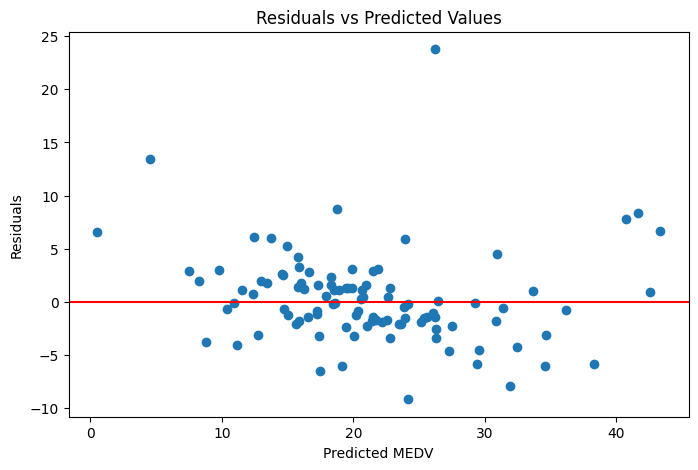

In [82]:
residuals = y_test - y_pred

plt.figure(figsize = (8,5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color = 'red')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

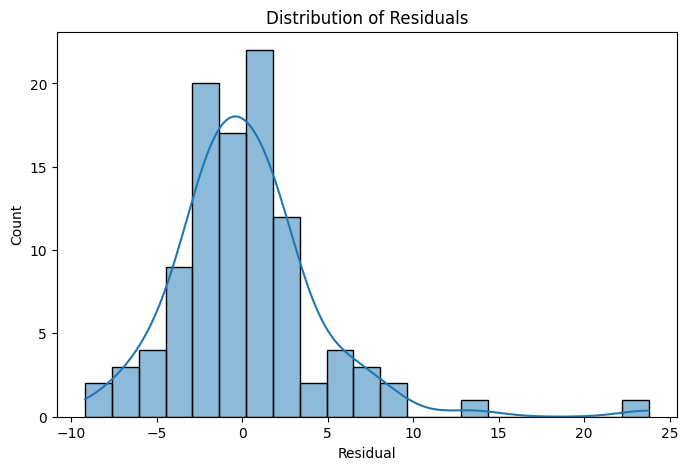

In [83]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.xlabel("Residual")
plt.title("Distribution of Residuals")
plt.show()


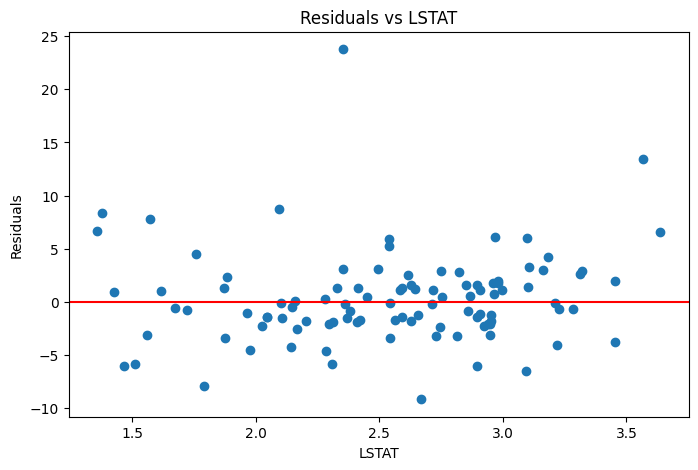

In [84]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test['LSTAT'], residuals)
plt.axhline(0, color='red')
plt.xlabel("LSTAT")
plt.ylabel("Residuals")
plt.title("Residuals vs LSTAT")
plt.show()

In [85]:
df['LSTAT_sq'] = df['LSTAT'] ** 2

In [86]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_Scaled = scaler.transform(X_train)
X_test_Scaled = scaler.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_Scaled, y_train)

y_pred_poly = model_poly.predict(X_test_Scaled)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print("RMSE with Polynomial Feature:", rmse_poly)
print("R² with Polynomial Feature:", r2_poly)

RMSE with Polynomial Feature: 4.182265453043129
R² with Polynomial Feature: 0.7614831314310033


Pivoting Towards Random Forest Regressor

In [87]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R²:", r2_rf)

Random Forest RMSE: 2.8429349702548667
Random Forest R²: 0.8897877772454683


In [88]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
5,RM,0.503989
12,LSTAT,0.166080
13,LSTAT_sq,0.145697
7,DIS,0.059394
0,CRIM,0.036585
10,PTRATIO,0.017115
9,TAX,0.015403
4,NOX,0.015343
6,AGE,0.013153
11,B,0.012161


Partial Dependency Plots (Explains how the important features behave with different values while training the model)

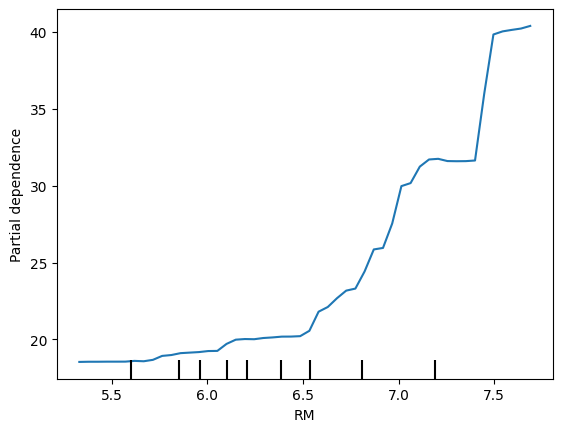

In [89]:
features = ['RM']
PartialDependenceDisplay.from_estimator(rf, X_train, features, grid_resolution=50)
plt.show()

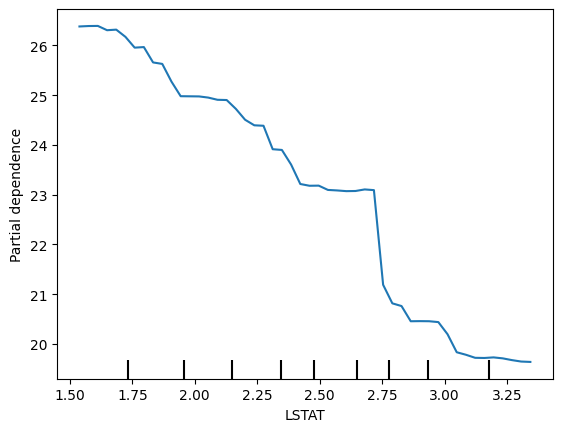

In [90]:
features = ['LSTAT']
PartialDependenceDisplay.from_estimator(rf, X_train, features, grid_resolution=50)
plt.show()

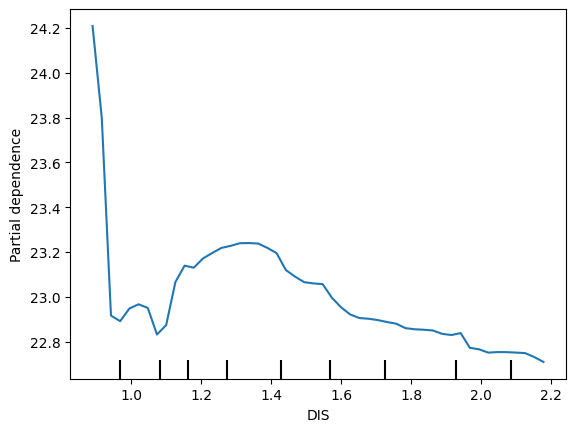

In [91]:
features = ['DIS']
PartialDependenceDisplay.from_estimator(rf, X_train, features, grid_resolution=50)
plt.show()

SHAP (Explains how the features affect the prices starting from the average)

In [92]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

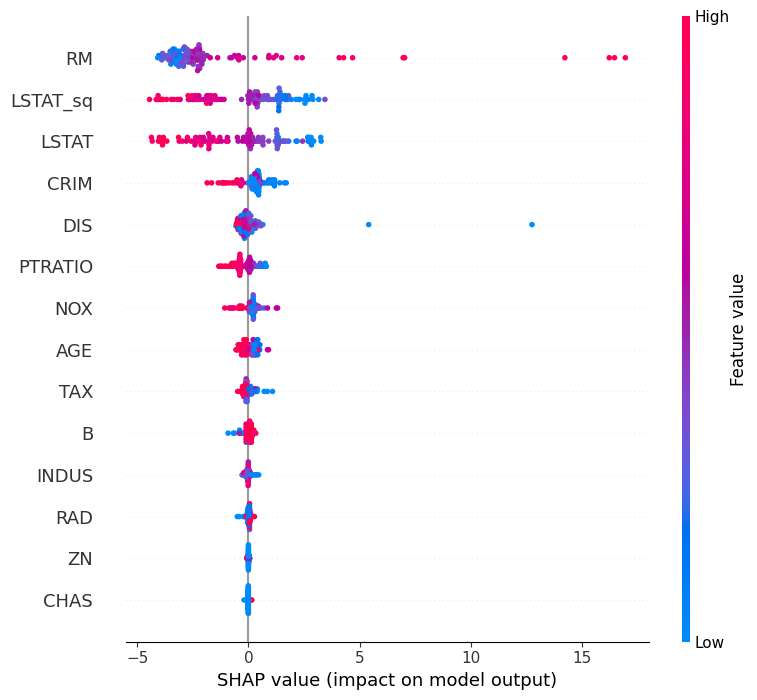

In [93]:
shap.summary_plot(shap_values, X_test)

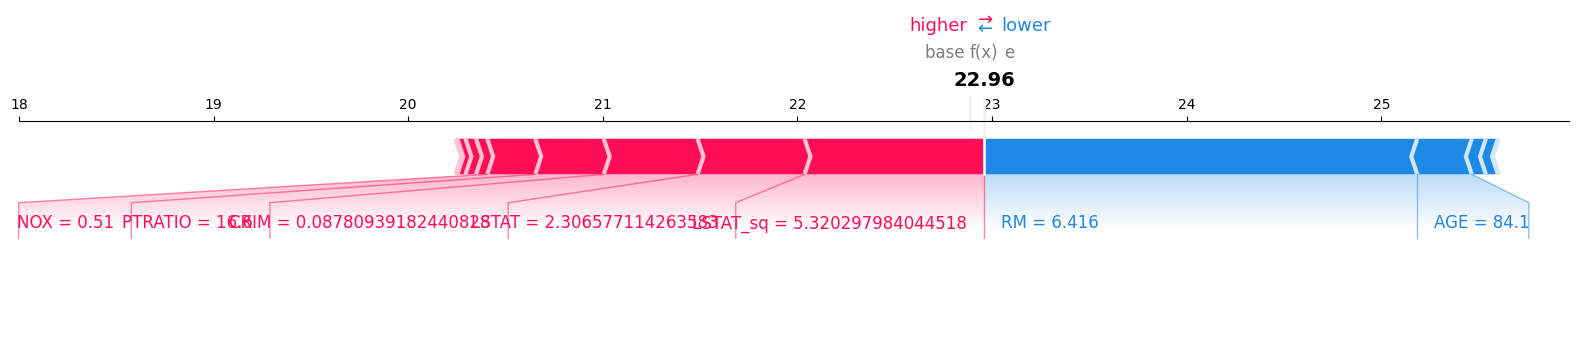

In [94]:
i = 0  # any index

shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X_test.iloc[i],
    matplotlib=True
)

Using Cross Validation

In [95]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=kfold, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print("Cross-Validation RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())

Cross-Validation RMSE scores: [3.02444388 3.22601087 4.11207275 3.04707476 2.81331857]
Mean RMSE: 3.244584165573196
Standard Deviation of RMSE: 0.45306581047478983


In [96]:
r2_scores = cross_val_score(rf, X, y, cv=kfold, scoring='r2')
print("Cross-Validation R² scores:", r2_scores)
print("Mean R²:", r2_scores.mean())
print("Standard Deviation of R²:", r2_scores.std())

Cross-Validation R² scores: [0.87526539 0.8674687  0.81414143 0.91110664 0.88992967]
Mean R²: 0.8715823663196968
Standard Deviation of R²: 0.03233802744203774


Fine-Tuning (Regularisation)

In [97]:
param_grid = {
    'max_depth': [None, 10, 15, 20],
    'min_samples_leaf': [1, 3, 5]
}

Using GridSearch

In [98]:
rf = RandomForestRegressor(n_estimators = 300, random_state = 42, n_jobs = -1)

grid_search = GridSearchCV(estimator = rf,
  param_grid = param_grid,
  scoring = 'neg_root_mean_squared_error',
  cv = 5,
  n_jobs = -1)

grid_search.fit(X,y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestR...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 3, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the 

In [99]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1}
Best CV RMSE: 4.393979249886823


In [100]:
best_rf = grid_search.best_estimator_

cv_rmse_tuned = cross_val_score(best_rf, X, y, cv = 5, scoring = 'neg_root_mean_squared_error')

cv_rmse_tuned = -cv_rmse_tuned

print("Tuned RMSE per fold:", cv_rmse_tuned)
print("Mean RMSE:", cv_rmse_tuned.mean())
print("Std RMSE:", cv_rmse_tuned.std())

Tuned RMSE per fold: [2.83218901 3.59488678 4.56089848 6.77992381 4.20199817]
Mean RMSE: 4.393979249886823
Std RMSE: 1.3292996467203224


Random Forest Regressor gave better results than the Fine-Tuned Model, so we are going to proceed with the Random Forest Regressor Model

Using Gradient Boosting

In [101]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)

y_pred_gb = gbr.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting RMSE:", rmse_gb)
print("Gradient Boosting R²:", r2_gb)

Gradient Boosting RMSE: 2.615639435880505
Gradient Boosting R²: 0.9067064405558324


In [102]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_rmse_gb = cross_val_score(
    gbr,
    X,
    y,
    cv=kf,
    scoring='neg_root_mean_squared_error'
)

cv_rmse_gb = -cv_rmse_gb

print("GB RMSE per fold:", cv_rmse_gb)
print("Mean RMSE:", cv_rmse_gb.mean())
print("Std RMSE:", cv_rmse_gb.std())

GB RMSE per fold: [2.61563944 2.89187946 3.75023086 2.63616982 2.72546374]
Mean RMSE: 2.9238766645006686
Std RMSE: 0.4245087001490085


In [103]:
gb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbr.feature_importances_
}).sort_values(by='Importance', ascending=False)

gb_importance.head(5)

,Feature,Importance
5,RM,0.409556
13,LSTAT_sq,0.197750
12,LSTAT,0.181048
7,DIS,0.070642
4,NOX,0.033023
